In [1]:
# This is the code for image prepocessing 
# i.e., getting rid of the background effects
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import image
from mxnet import init
from mxnet import nd
from mxnet.gluon import nn
from mxnet.gluon.data import vision
from mxnet.gluon.model_zoo import vision as models
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import h5py
import os
from glob import glob
from matplotlib import pyplot as plt

n = len(glob('../../data/train/*/*.jpg')) # this is the directory contains add the raw images

main_dir = '../../data/Segmented/train/'
if not os.path.exists(main_dir):
    os.makedirs(main_dir)



  0%|          | 0/5656 [00:00<?, ?it/s]

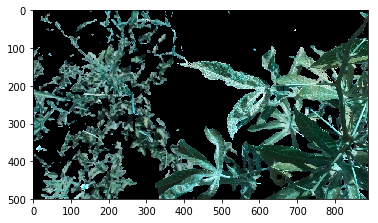

  0%|          | 1/5656 [00:00<38:05,  2.47it/s]

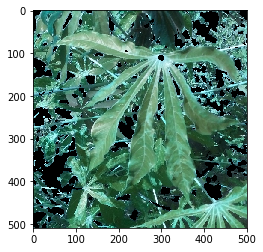

  0%|          | 2/5656 [00:00<33:56,  2.78it/s]

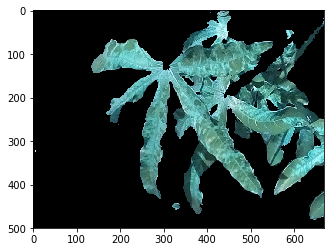

  0%|          | 3/5656 [00:01<33:32,  2.81it/s]

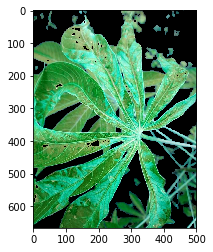

  0%|          | 4/5656 [00:01<32:51,  2.87it/s]

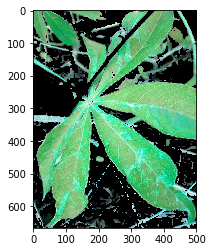

  0%|          | 5/5656 [00:01<31:23,  3.00it/s]

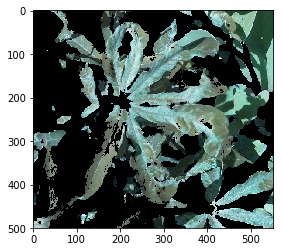

  0%|          | 6/5656 [00:02<32:23,  2.91it/s]

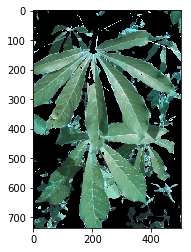

  0%|          | 7/5656 [00:02<33:43,  2.79it/s]

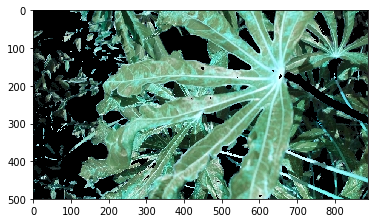

  0%|          | 8/5656 [00:02<35:52,  2.62it/s]

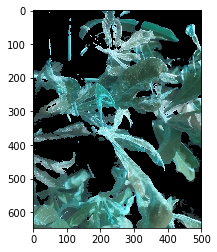

  0%|          | 9/5656 [00:03<35:14,  2.67it/s]

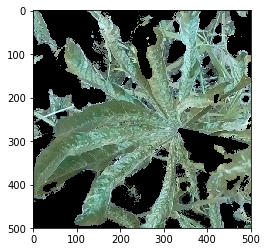

  0%|          | 10/5656 [00:03<33:12,  2.83it/s]

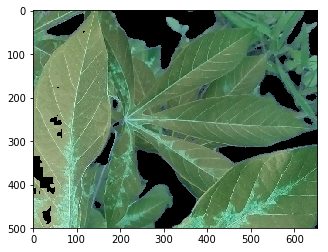

  0%|          | 11/5656 [00:03<29:35,  3.18it/s]

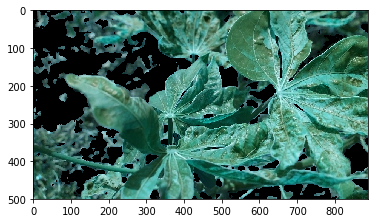

  0%|          | 12/5656 [00:03<28:14,  3.33it/s]

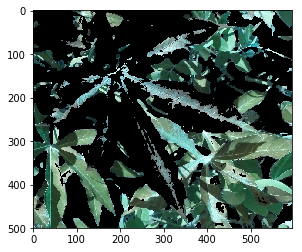

  0%|          | 13/5656 [00:04<28:11,  3.34it/s]

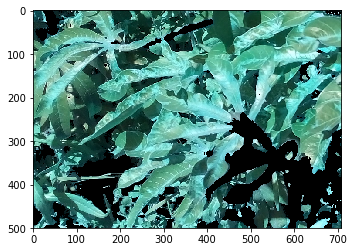

  0%|          | 14/5656 [00:04<28:43,  3.27it/s]

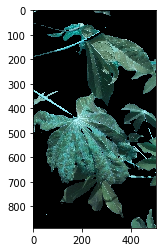

  0%|          | 15/5656 [00:04<27:46,  3.39it/s]

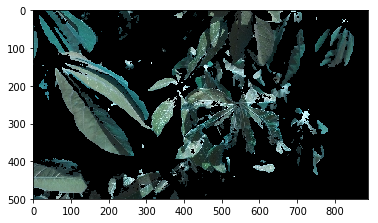

  0%|          | 16/5656 [00:05<27:56,  3.36it/s]

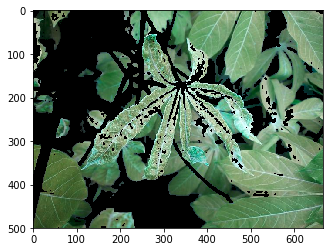

  0%|          | 17/5656 [00:05<28:33,  3.29it/s]

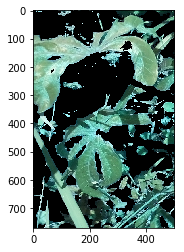

  0%|          | 18/5656 [00:05<25:08,  3.74it/s]

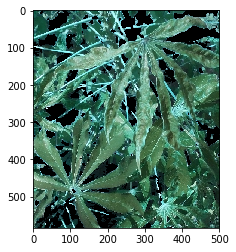

  0%|          | 19/5656 [00:05<23:29,  4.00it/s]

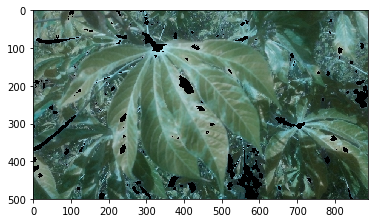

  0%|          | 20/5656 [00:06<24:47,  3.79it/s]

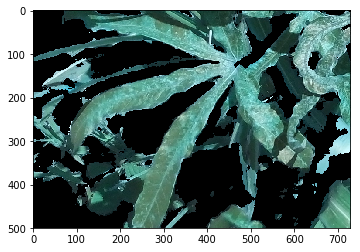

  0%|          | 21/5656 [00:06<23:47,  3.95it/s]

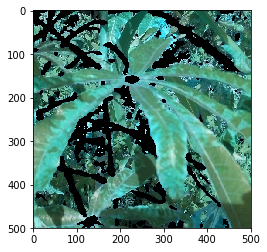

  0%|          | 22/5656 [00:06<23:29,  4.00it/s]

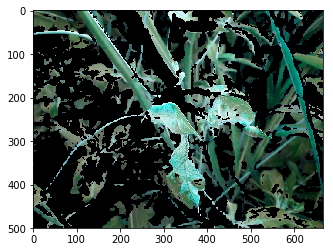

  0%|          | 23/5656 [00:07<26:19,  3.57it/s]

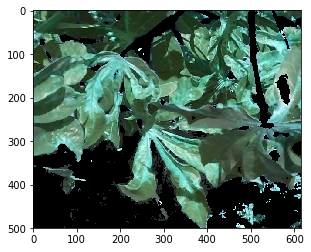

  0%|          | 24/5656 [00:07<25:21,  3.70it/s]

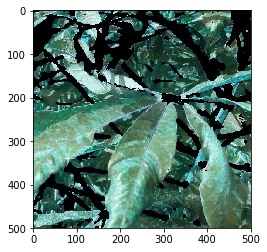

  0%|          | 25/5656 [00:07<26:49,  3.50it/s]

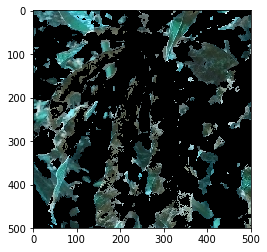

  0%|          | 26/5656 [00:07<26:18,  3.57it/s]

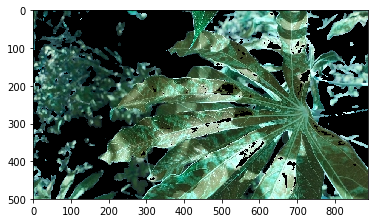

  0%|          | 27/5656 [00:08<28:31,  3.29it/s]

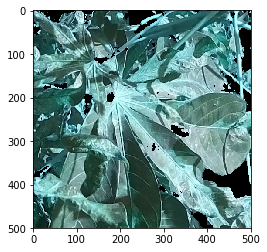

  0%|          | 28/5656 [00:08<28:23,  3.30it/s]

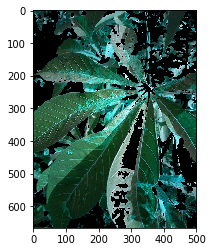

  1%|          | 29/5656 [00:08<27:57,  3.35it/s]

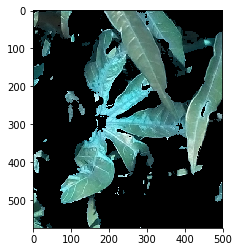

  1%|          | 30/5656 [00:09<27:39,  3.39it/s]

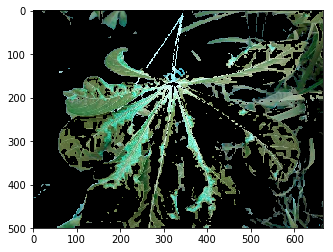

  1%|          | 31/5656 [00:09<26:53,  3.49it/s]

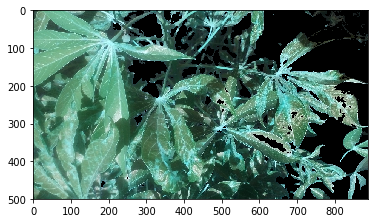

  1%|          | 32/5656 [00:09<27:56,  3.35it/s]

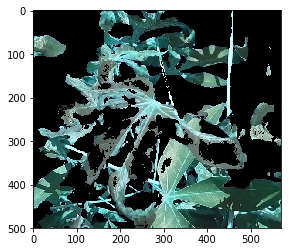

  1%|          | 33/5656 [00:09<28:16,  3.31it/s]

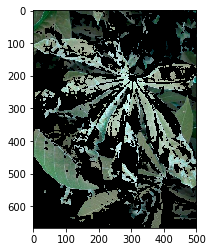

  1%|          | 34/5656 [00:10<28:09,  3.33it/s]

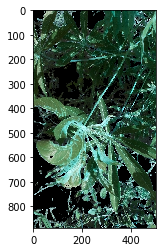

  1%|          | 35/5656 [00:10<28:45,  3.26it/s]

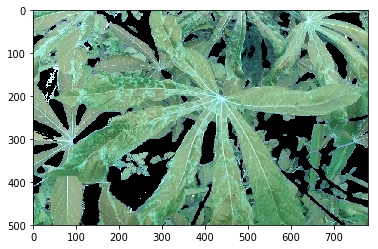

  1%|          | 36/5656 [00:10<29:48,  3.14it/s]

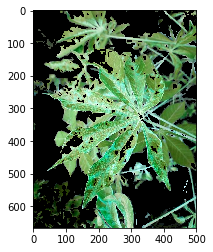

  1%|          | 37/5656 [00:11<28:57,  3.23it/s]

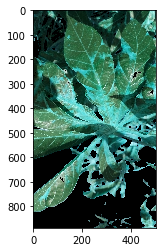

  1%|          | 38/5656 [00:11<29:18,  3.19it/s]

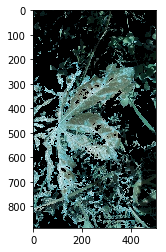

  1%|          | 39/5656 [00:12<35:06,  2.67it/s]

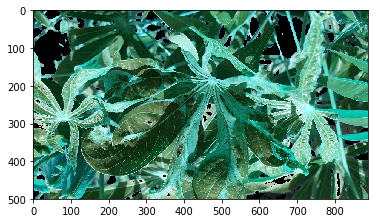

  1%|          | 40/5656 [00:12<38:53,  2.41it/s]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/network/home/birhanei/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-219fe74fdbde>", line 18, in <module>
    plt.show()
  File "/network/home/birhanei/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/pyplot.py", line 253, in show
    return _show(*args, **kw)
  File "/network/home/birhanei/.local/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/network/home/birhanei/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/display.py", line 304, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/network/home/birhanei/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "</net

KeyboardInterrupt: 

In [3]:
for i, file_name in tqdm(enumerate(glob('../../data/train/*/*.jpg')), total=n):

    frame = cv2.imread(file_name)
    subfolder = file_name.split('/')[4]
    file_name = file_name.split('/')[5]
    #print (subfolder)
    #convert BGR to HSV 
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    #define the range of GREEN color in HSV
    lower_green = np.array([25,25,25])
    upper_green = upper_blue = np.array([80,255,255])
    #only remain green color in a image
    mask = cv2.inRange(hsv, lower_green, upper_green)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    #print file_name
    #save all the images after preprocessing
    plt.imshow(res)
    plt.show()
    if not os.path.exists(main_dir+subfolder):
        
        os.makedirs(main_dir+subfolder)


    #cv2.imwrite('../../data/Segmented/train/%s/%s'%(subfolder,file_name),res)

